# Exercise 3b: Masking

## Aim: Learn to mask data in xarray

Find the teaching material here: https://tutorial.xarray.dev/intermediate/indexing/boolean-masking-indexing.html

### Issues covered: 
- Create re-usable masks for data
- Plot masked data

Q1. For masking, we're back to using our ocean dataset. Load it now from `../data/vbhubo.pgc0apr.nc`.

In [1]:
import xarray as xr
ds=xr.open_dataset('../data/xbhubo.pgc0apr.nc')
ds

<xarray.Dataset> Size: 13MB
Dimensions:      (longitude: 288, latitude: 144, depth: 20, t: 1,
                  longitude_1: 288, latitude_1: 143)
Coordinates:
  * longitude    (longitude) float32 1kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude     (latitude) float32 576B -89.38 -88.12 -86.88 ... 88.12 89.38
  * depth        (depth) float32 80B 5.0 15.0 25.0 ... 4.577e+03 5.192e+03
  * t            (t) object 8B 1920-04-16 00:00:00
  * longitude_1  (longitude_1) float32 1kB 0.625 1.875 3.125 ... 358.1 359.4
  * latitude_1   (latitude_1) float32 572B -88.75 -87.5 -86.25 ... 87.5 88.75
Data variables:
    temp         (t, depth, latitude, longitude) float32 3MB ...
    salinity     (t, depth, latitude, longitude) float32 3MB ...
    ucurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
    vcurr        (t, depth, latitude_1, longitude_1) float32 3MB ...
Attributes:
    history:      Tue Sep 12 11:49:35 BST 2006 - CONVSH V1.91 16-February-2006
    Conventions:  CF-1.0

Q2. Determine which grid cells sea surface temperaturevis more than the mean.

In [2]:
temperature=ds['temp']

In [7]:
surface = ds.sel(depth=0, method="nearest")
temp_more_than_mean=surface.temp.where(surface.temp > surface.temp.mean())

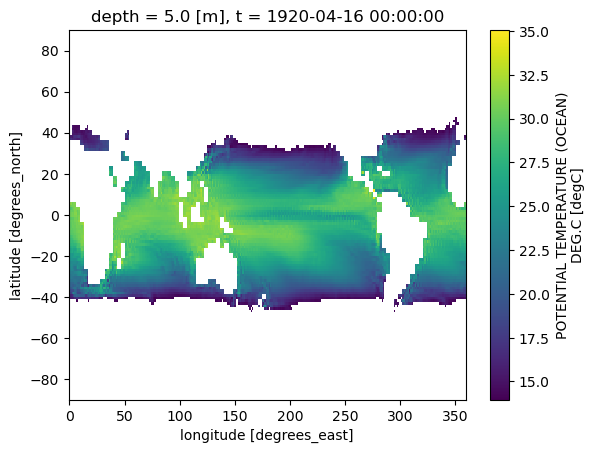

In [8]:
temp_more_than_mean.plot()

Q3. Combine this with another .where() lookup to show only cells where the temperature is more than the mean and salinity is more than the mean.

In [11]:
temp_salinity_more_than_mean=surface.temp.where(surface.temp > surface.temp.mean()).where(surface.salinity > surface.salinity.mean())

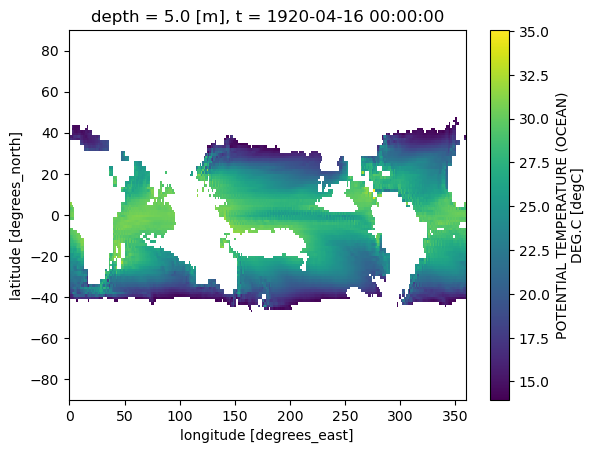

In [12]:
temp_salinity_more_than_mean.plot()

Q4. Masks are just boolean arrays. Create a re-usuable mask for the temperature and sst criteia above, and a combined one.

In [15]:
def criteria(ds):
    temp_mean=ds.temp.mean()
    salinity_mean=ds.salinity.mean()
    temp_mask=ds.temp>temp_mean
    salinity_mask=ds.salinity>salinity_mean
    mask=temp_mask&salinity_mask
    return mask

Q5. Use this mask to make the same temperature plot, and a similar one for sst.

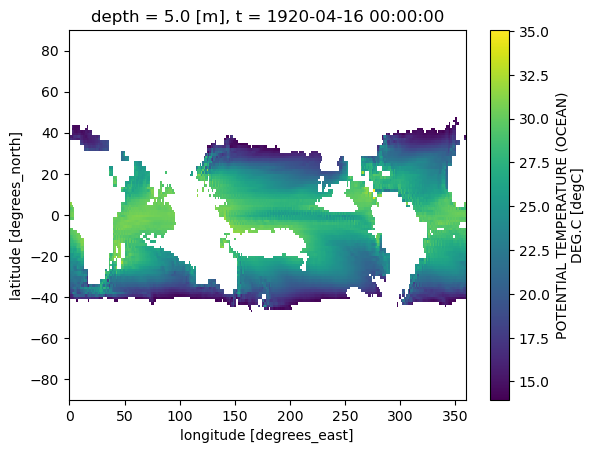

In [16]:
surface.temp.where(criteria(surface)).plot()